In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
import math
from multiprocessing import Pool

from utils import *

%matplotlib inline

In [23]:
# Daniel M Abrams et al. Solvable Model for Chimera States of Coupled Oscillators. PRL, 2008.
Nc=2
Nn=32
Nie=Nn*Nn
G=Modules_full(Nc,Nn,Nie,rando=False)

B, Bplus, v, w=compute_eig_projection(G)

rel=0.24
nu=(1-rel)/2
mu=1-nu
beta = 0.1
alpha = np.pi/2 - beta

a = 1

theta_0 = np.pi+np.random.normal(0, 1, len(G))
# theta_0 = np.concatenate((np.pi*np.ones(len(G)/2),np.pi+np.random.normal(0, 1, len(G)/2)),axis = 0)
omega_0 = np.zeros(len(G))
t_max = 1000
n_t = 100

W_e=np.ones(B.shape[0])
for i in range(B.shape[0]):
    if (((np.nonzero(B[i,:])[0]<Nn).all())or((np.nonzero(B[i,:])[0]>=Nn).all())):
        W_e[i]=mu
    else:
        W_e[i]=nu
W_e=np.diag(W_e)

sol_full = integrate_kuramoto_full_theta_weighted(B, Bplus, theta_0, t_max, n_t, alpha, a, omega_0, W_e)
sol_full.y = np.mod(sol_full.y,2*np.pi)

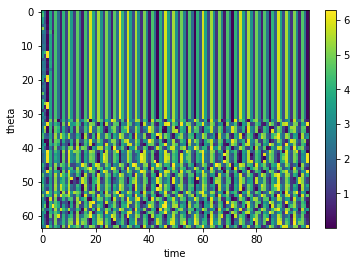

In [24]:
plt.figure()
plt.imshow(sol_full.y,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('theta')

0.0031771058723359127 0.030528065814053127


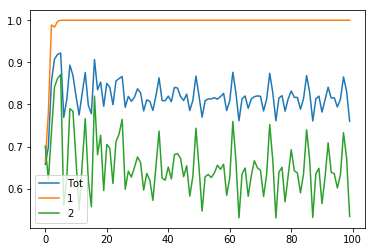

In [25]:
op=order_parameter(sol_full.y, Nc, Nn)
lt, chit = Shanahan_indices(op)
plt.figure()
plt.plot(op[0,:], label= r'Tot')
plt.plot(op[1,:], label= r'1')
plt.plot(op[2,:], label= r'2')
plt.legend()
print lt,chit